Import library

In [ ]:
pip install pulp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 85.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import pulp

In [ ]:
#file_path = '/content/data_2022_2023.csv'
#gymnastic_data = pd.read_csv(file_path)
gymnastic_data = pd.read_csv('data_2022_2023_111823.csv')
gymnastic_data.head()

FileNotFoundError: ignored

In [ ]:
def assign_medal_points(rank):
    if rank == 1:
        return 3  # Points for a gold medal
    elif rank == 2:
        return 2  # Points for a silver medal
    elif rank == 3:
        return 1  # Points for a bronze medal
    else:
        return 0  # No points if no medal

gymnastic_data['Medal_Points'] = gymnastic_data['Rank'].apply(assign_medal_points)

In [ ]:
gymnastic_data

,LastName,FirstName,Gender,Country,Date,Competition,Round,Location,Apparatus,Rank,D_Score,E_Score,Penalty,Score,Medal_Points
0,AAS,Fredrik,m,NOR,24-27 Feb 2022,2022 Cottbus World Cup,qual,"Cottbus, Germany",HB,18.0,3.9,8.266,NaN,12.166,0
1,AAS,Fredrik,m,NOR,24-27 Feb 2022,2022 Cottbus World Cup,qual,"Cottbus, Germany",PB,23.0,3.9,6.900,NaN,10.800,0
2,AAS,Fredrik,m,NOR,24-27 Feb 2022,2022 Cottbus World Cup,qual,"Cottbus, Germany",PH,33.0,4.2,6.666,NaN,10.866,0
3,AAS,Fredrik,m,NOR,23-26 Feb 2023,2023 Cottbus World Cup,qual,"Cottbus, Germany",HB,39.0,4.6,6.700,NaN,11.300,0
4,AAS,Fredrik,m,NOR,23-26 Feb 2023,2023 Cottbus World Cup,qual,"Cottbus, Germany",PH,44.0,4.4,7.800,NaN,12.200,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24429,ÖNDER,Ahmet,m,TUR,1-4 Jun 2023,2023 Tel Aviv World Challenge Cup,final,"Tel Aviv, Israel",FX,8.0,4.8,7.050,NaN,11.850,0
24430,ÖNDER,Ahmet,m,TUR,1-4 Jun 2023,2023 Tel Aviv World Challenge Cup,qual,"Tel Aviv, Israel",FX,3.0,5.8,7.950,0.1,13.650,1
24431,ÖNDER,Ahmet,m,TUR,1-4 Jun 2023,2023 Tel Aviv World Challenge Cup,qual,"Tel Aviv, Israel",HB,10.0,5.0,6.250,NaN,11.250,0
24432,ÖNDER,Ahmet,m,TUR,1-4 Jun 2023,2023 Tel Aviv World Challenge Cup,final,"Tel Aviv, Israel",PB,1.0,6.3,8.050,NaN,14.350,3


In [ ]:
gymnastic_data_V2 = gymnastic_data.copy()
gymnastic_data_V2['Mean_within_comp_round_app'] = gymnastic_data_V2.groupby(['Competition', 'Round', 'Apparatus'])['Score'].transform('mean')
gymnastic_data_V2

,LastName,FirstName,Gender,Country,Date,Competition,Round,Location,Apparatus,Rank,D_Score,E_Score,Penalty,Score,Medal_Points,Mean_within_comp_round_app
0,AAS,Fredrik,m,NOR,24-27 Feb 2022,2022 Cottbus World Cup,qual,"Cottbus, Germany",HB,18.0,3.9,8.266,NaN,12.166,0,12.596107
1,AAS,Fredrik,m,NOR,24-27 Feb 2022,2022 Cottbus World Cup,qual,"Cottbus, Germany",PB,23.0,3.9,6.900,NaN,10.800,0,12.945040
2,AAS,Fredrik,m,NOR,24-27 Feb 2022,2022 Cottbus World Cup,qual,"Cottbus, Germany",PH,33.0,4.2,6.666,NaN,10.866,0,12.587692
3,AAS,Fredrik,m,NOR,23-26 Feb 2023,2023 Cottbus World Cup,qual,"Cottbus, Germany",HB,39.0,4.6,6.700,NaN,11.300,0,12.198277
4,AAS,Fredrik,m,NOR,23-26 Feb 2023,2023 Cottbus World Cup,qual,"Cottbus, Germany",PH,44.0,4.4,7.800,NaN,12.200,0,12.707127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24429,ÖNDER,Ahmet,m,TUR,1-4 Jun 2023,2023 Tel Aviv World Challenge Cup,final,"Tel Aviv, Israel",FX,8.0,4.8,7.050,NaN,11.850,0,13.166750
24430,ÖNDER,Ahmet,m,TUR,1-4 Jun 2023,2023 Tel Aviv World Challenge Cup,qual,"Tel Aviv, Israel",FX,3.0,5.8,7.950,0.1,13.650,1,12.425000
24431,ÖNDER,Ahmet,m,TUR,1-4 Jun 2023,2023 Tel Aviv World Challenge Cup,qual,"Tel Aviv, Israel",HB,10.0,5.0,6.250,NaN,11.250,0,11.784615
24432,ÖNDER,Ahmet,m,TUR,1-4 Jun 2023,2023 Tel Aviv World Challenge Cup,final,"Tel Aviv, Israel",PB,1.0,6.3,8.050,NaN,14.350,3,13.700000


In [ ]:
# Filter the dataset to only include results from USA gymnasts
usa_gymnastics_data_male = gymnastic_data[(gymnastic_data['Country'] == 'USA') & (gymnastic_data['Gender'] == 'm' )]

# We will perform a basic check for duplicates based on gymnast's first and last names, and apparatus, assuming that a gymnast can't have more than one rank for the same apparatus in the same competition and round.
# Any duplicates detected by this criteria will be reviewed.
duplicates_check = usa_gymnastics_data_male.duplicated(subset=['FirstName', 'LastName', 'Competition', 'Round', 'Apparatus'], keep=False)

# Display potential duplicates if any, and the overall summary of USA gymnasts' performance
potential_duplicates = usa_gymnastics_data_male[duplicates_check]
summary_of_performance = usa_gymnastics_data_male.describe()

potential_duplicates, summary_of_performance

(      LastName FirstName Gender Country                      Date  \
 8462      HONG     Asher      m     USA  29 Oct 2022 - 6 Nov 2022   
 8463      HONG     Asher      m     USA  29 Oct 2022 - 6 Nov 2022   
 8499      HONG     Asher      m     USA  30 Sep 2023 - 8 Oct 2023   
 8500      HONG     Asher      m     USA  30 Sep 2023 - 8 Oct 2023   
 9531      JUDA      Paul      m     USA  30 Sep 2023 - 8 Oct 2023   
 9532      JUDA      Paul      m     USA  30 Sep 2023 - 8 Oct 2023   
 23831    YOUNG      Khoi      m     USA  30 Sep 2023 - 8 Oct 2023   
 23832    YOUNG      Khoi      m     USA  30 Sep 2023 - 8 Oct 2023   
 
                                              Competition Round  \
 8462   2022 51st FIG Artistic Gymnastics World Champi...  qual   
 8463   2022 51st FIG Artistic Gymnastics World Champi...  qual   
 8499   2023 52nd FIG Artistic Gymnastics World Champi...  qual   
 8500   2023 52nd FIG Artistic Gymnastics World Champi...  qual   
 9531   2023 52nd FIG Artistic Gy

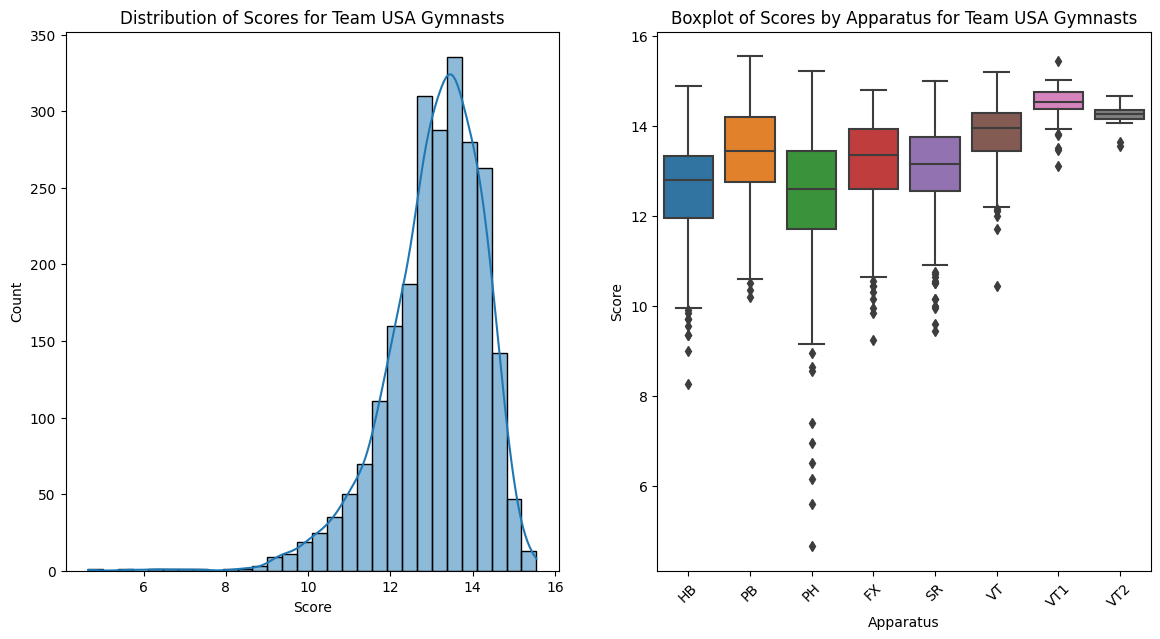

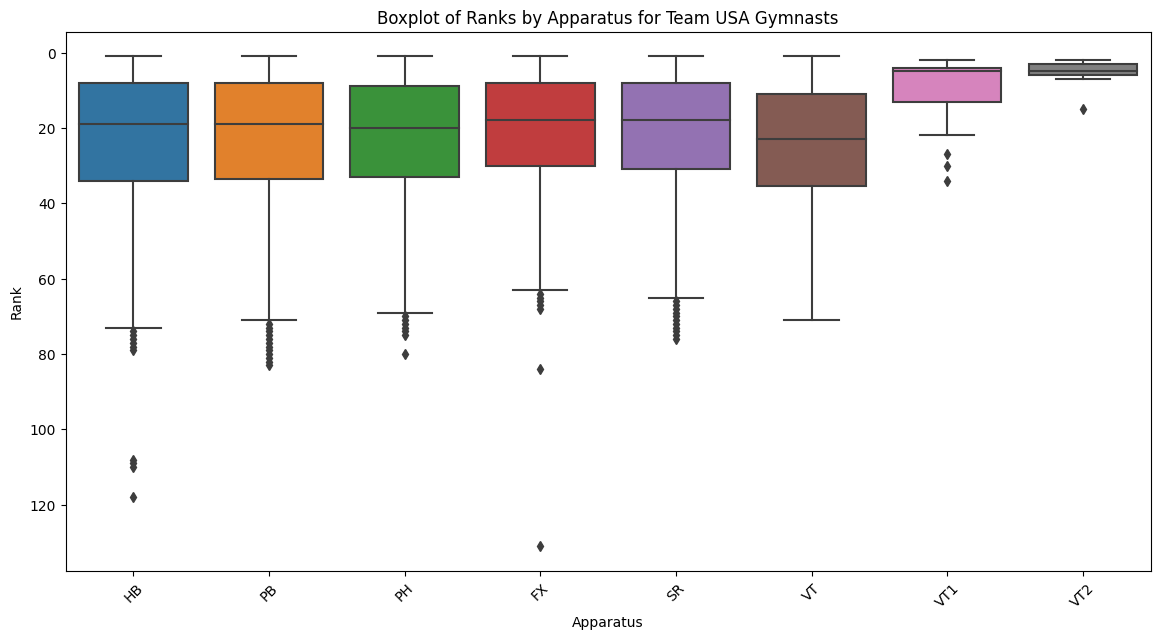

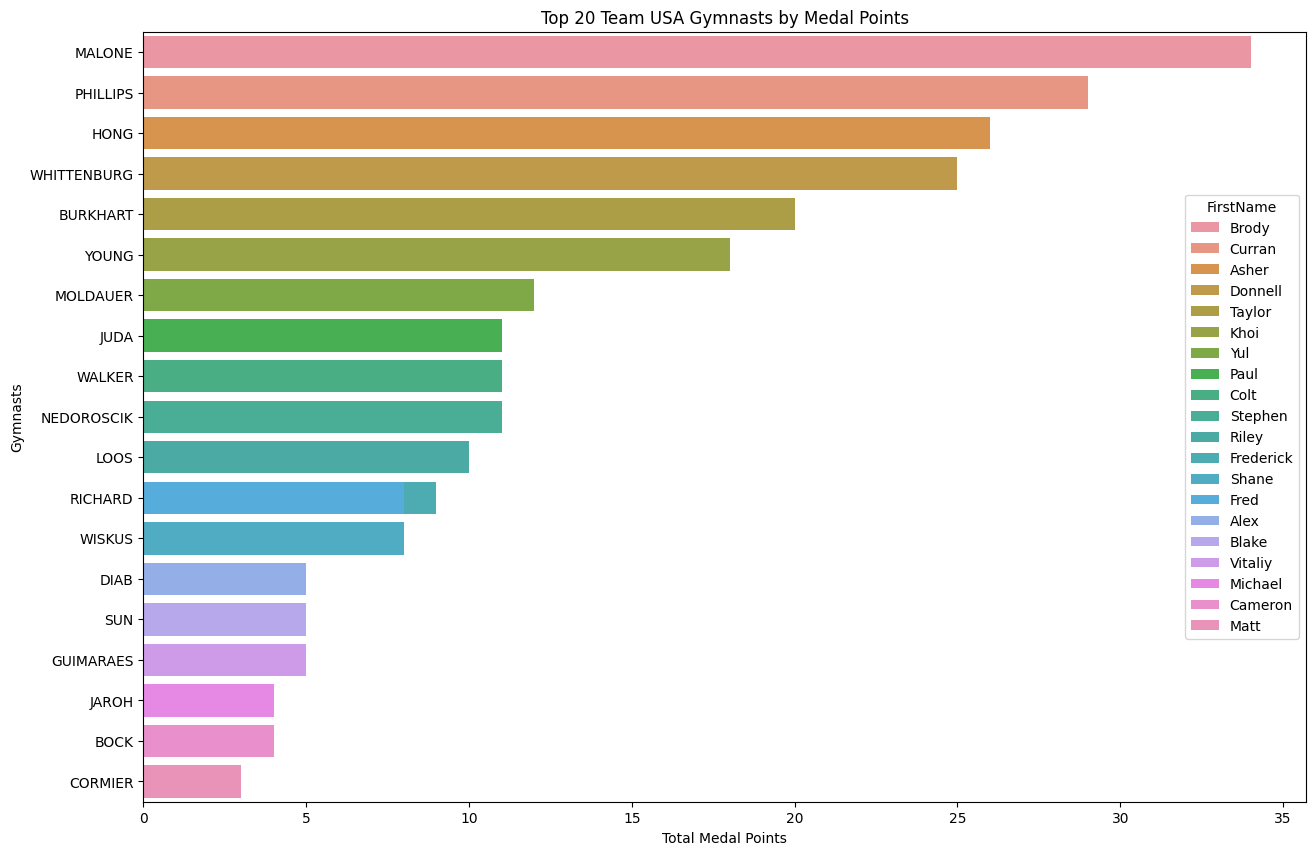

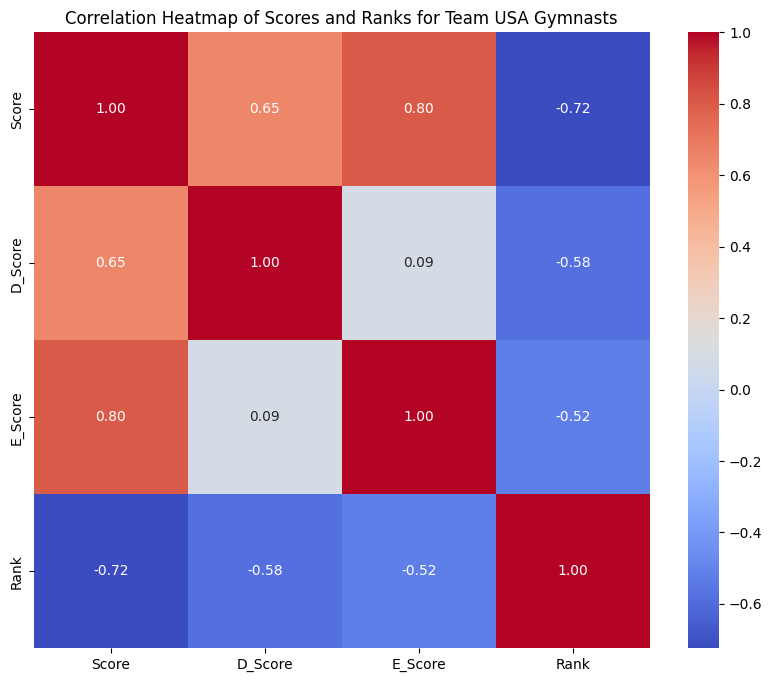

In [ ]:
############### EDA ###############
# Distribution of Scores for Team USA gymnasts
plt.figure(figsize=(14, 7))

# Histogram of Scores
plt.subplot(1, 2, 1)
sns.histplot(usa_gymnastics_data_male['Score'], bins=30, kde=True)
plt.title('Distribution of Scores for Team USA Gymnasts')

# Boxplot of Scores by Apparatus
plt.subplot(1, 2, 2)
sns.boxplot(x='Apparatus', y='Score', data=usa_gymnastics_data_male)
plt.title('Boxplot of Scores by Apparatus for Team USA Gymnasts')
plt.xticks(rotation=45)
plt.show()

# Boxplot of Ranks by Apparatus
plt.figure(figsize=(14, 7))
sns.boxplot(x='Apparatus', y='Rank', data=usa_gymnastics_data_male)
plt.title('Boxplot of Ranks by Apparatus for Team USA Gymnasts')
plt.gca().invert_yaxis()  # Invert y-axis to have the best ranks at the top
plt.xticks(rotation=45)
plt.show()

# EDA: Distribution of Medal Points for Team USA gymnasts
plt.figure(figsize=(15, 10))
# We will only display the top 20 gymnasts with the most medal points for clarity
top_medal_points = usa_gymnastics_data_male.groupby(['FirstName', 'LastName'])['Medal_Points'].sum().reset_index()
top_medal_points = top_medal_points.sort_values(by='Medal_Points', ascending=False).head(20)

# Barplot of Medal Points
sns.barplot(x='Medal_Points', y='LastName', data=top_medal_points, hue='FirstName', dodge=False)
plt.title('Top 20 Team USA Gymnasts by Medal Points')
plt.xlabel('Total Medal Points')
plt.ylabel('Gymnasts')
plt.show()

# Calculate the correlation matrix for the numerical features of the Team USA gymnasts
correlation_matrix = usa_gymnastics_data_male[['Score', 'D_Score', 'E_Score', 'Rank']].corr()
# Generate a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title('Correlation Heatmap of Scores and Ranks for Team USA Gymnasts')
plt.show()

In [ ]:
# Group the data by gymnast and apparatus to get a summary of their performances
gymnast_performance_summary = usa_gymnastics_data_male.groupby(['FirstName', 'LastName', 'Apparatus'])\
                                                  .agg({'Rank': ['min', 'mean'], # Minimum and mean rank for medal potential
                                                        'Score': 'mean', # Mean score for performance level
                                                        'Medal_Points': 'sum'}) # Total medal points for weighted medal count
# Flatten the multi-level column index resulted from aggregation
gymnast_performance_summary.columns = ['_'.join(col).strip() for col in gymnast_performance_summary.columns.values]

# Reset index to make 'FirstName', 'LastName', and 'Apparatus' as columns again
gymnast_performance_summary.reset_index(inplace=True)

# We will sort by total medal points to identify top performers, then by mean score as a secondary criterion
gymnast_performance_summary_sorted = gymnast_performance_summary.sort_values(by=['Medal_Points_sum', 'Score_mean'], ascending=[False, False])

# Display top performers based on medal points and scores
gymnast_performance_summary_sorted.head()

,FirstName,LastName,Apparatus,Rank_min,Rank_mean,Score_mean,Medal_Points_sum
181,Curran,PHILLIPS,PB,1.0,2.111111,14.889692,21
90,Brody,MALONE,HB,1.0,2.200000,14.372923,21
223,Donnell,WHITTENBURG,SR,1.0,3.900000,14.540933,16
671,Stephen,NEDOROSCIK,PH,1.0,3.000000,14.295667,11
681,Taylor,BURKHART,FX,1.0,9.428571,13.850000,10


In [ ]:
# Identify the top performers for each apparatus based on the historical data
# We will calculate the average score for each gymnast on each apparatus
# Then we will select the top 4 gymnasts based on the average score for the '4 up, 3 count' simulation

# Calculate average score for each gymnast on each apparatus
apparatus_average_scores = usa_gymnastics_data_male.groupby(['Apparatus', 'FirstName', 'LastName'])\
                                             .agg({'Score': 'mean'})\
                                             .reset_index()

# Sort the results to find the top performers for each apparatus
top_performers_per_apparatus = apparatus_average_scores.sort_values(['Apparatus', 'Score'], ascending=[True, False])

# Now we create a dictionary to hold the top 4 gymnasts for each apparatus
top_performers_dict = {}

for apparatus in top_performers_per_apparatus['Apparatus'].unique():
    top_performers_dict[apparatus] = top_performers_per_apparatus[top_performers_per_apparatus['Apparatus'] == apparatus].head(4)

top_performers_dict['FX']  # Example output for Floor Exercise (FX)

,Apparatus,FirstName,LastName,Score
93,FX,Paul,JUDA,14.341500
120,FX,Yul Kyung Tae,MOLDAUER,14.300000
116,FX,Vitaliy,GUIMARAES,14.250000
43,FX,Frederick,RICHARD,14.142714


In [ ]:
# Initialize an empty list to hold dataframes for top performers
top_performers_list = []

# Loop through each apparatus and get the top 4 performers
for apparatus in usa_gymnastics_data_male['Apparatus'].unique():
    top_performers = apparatus_average_scores[apparatus_average_scores['Apparatus'] == apparatus]\
                     .nlargest(4, 'Score')
    top_performers_list.append(top_performers)

# Concatenate all the dataframes in the list into one dataframe
top_performers_all_apparatus = pd.concat(top_performers_list)

def simulate_4_up_3_count(apparatus_data):
    # Sort the gymnasts by score in descending order (best scores first)
    sorted_gymnasts = apparatus_data.sort_values('Score', ascending=False)
    # Take the scores of the top 4 gymnasts
    top_scores = sorted_gymnasts.head(4)['Score']
    # Sum the best 3 scores out of the top 4 for the team score
    team_score = top_scores.nlargest(3).sum()
    return team_score


# the '4 up, 3 count' simulation
team_scores_qualification = top_performers_all_apparatus.groupby('Apparatus')\
                                                        .apply(simulate_4_up_3_count)\
                                                        .reset_index(name='Team_Score')

# Display the team scores for each apparatus
team_scores_qualification.sort_values('Team_Score', ascending=False)

# %%
# For '3 up, 3 count' simulation, we sum the scores for the top three gymnasts for each apparatus
# This function will be used to perform the simulation for each apparatus
def simulate_3_up_3_count(apparatus_data):
    # Sort the gymnasts by score in descending order (best scores first)
    sorted_gymnasts = apparatus_data.sort_values('Score', ascending=False)
    # Take the scores of the top 3 gymnasts since all scores count in the '3 up, 3 count' format
    team_score = sorted_gymnasts.head(3)['Score'].sum()
    return team_score

# Apply the simulation for each apparatus and get the team score
team_scores_final = top_performers_all_apparatus.groupby('Apparatus')\
                                                 .apply(simulate_3_up_3_count)\
                                                 .reset_index(name='Team_Score')

# Display the team scores for each apparatus for the '3 up, 3 count' scenario
team_scores_final.sort_values('Team_Score', ascending=False)

,Apparatus,Team_Score
6,VT1,44.327667
2,PB,44.230359
5,VT,44.210000
7,VT2,43.282250
3,PH,43.029167
4,SR,42.925767
0,FX,42.891500
1,HB,42.410048


In [ ]:
# Calculate the total medal count for each gymnast
total_medals = usa_gymnastics_data_male.groupby(['FirstName', 'LastName'])['Medal_Points'].sum().reset_index()

# Calculate the number of gold medals for each gymnast (gold is represented by 3 points in Medal_Points)
gold_medals = usa_gymnastics_data_male[usa_gymnastics_data_male['Medal_Points'] == 3].groupby(['FirstName', 'LastName']).size().reset_index(name='Gold_Count')

# Merge the total medals and gold medal counts
medal_counts = total_medals.merge(gold_medals, on=['FirstName', 'LastName'], how='left')
medal_counts['Gold_Count'] = medal_counts['Gold_Count'].fillna(0)

# Calculate the weighted medal count
medal_counts['Weighted_Medal_Count'] = medal_counts['Medal_Points']  # This already represents the weighted count

# Display the gymnasts sorted by total medals, gold medals, and weighted medal count
medal_counts.sort_values(by=['Medal_Points', 'Gold_Count', 'Weighted_Medal_Count'], ascending=False).head()

# %%
# Calculate the average score and standard deviation for each gymnast on each apparatus
gymnast_scores_stats = usa_gymnastics_data_male.groupby(['FirstName', 'LastName', 'Apparatus'])\
                                         .agg(Average_Score=('Score', 'mean'),
                                              Score_SD=('Score', 'std'),
                                              Routine_Count=('Score', 'count'))\
                                         .reset_index()

# Replace NaN values in Score_SD with 0 (occurs when there's only one score)
gymnast_scores_stats['Score_SD'] = gymnast_scores_stats['Score_SD'].fillna(0)

# Now, let's calculate the number of medals each gymnast has won
# We consider the Medal_Points where 3 points = Gold, 2 points = Silver, 1 point = Bronze
medal_counts = usa_gymnastics_data_male.groupby(['FirstName', 'LastName'])\
                                 .agg(Total_Medal_Points=('Medal_Points', 'sum'),
                                      Gold_Medal_Count=('Medal_Points', lambda x: (x==3).sum()),
                                      Silver_Medal_Count=('Medal_Points', lambda x: (x==2).sum()),
                                      Bronze_Medal_Count=('Medal_Points', lambda x: (x==1).sum()))\
                                 .reset_index()

# Merge the scores stats with the medal counts to get a combined dataframe
gymnast_performance_summary = pd.merge(gymnast_scores_stats, medal_counts, on=['FirstName', 'LastName'])

# Sort by Average Score and Total Medal Points to identify the top performers
gymnast_performance_summary.sort_values(by=['Average_Score', 'Total_Medal_Points'], ascending=[False, False]).head()

,FirstName,LastName,Apparatus,Average_Score,Score_SD,Routine_Count,Total_Medal_Points,Gold_Medal_Count,Silver_Medal_Count,Bronze_Medal_Count
181,Curran,PHILLIPS,PB,14.889692,0.710749,13,29,8,2,1
459,Khoi,YOUNG,VT1,14.877667,0.134523,3,18,1,7,1
458,Khoi,YOUNG,VT,14.777000,0.294285,8,18,1,7,1
762,Yul,MOLDAUER,VT1,14.750000,0.000000,1,12,0,5,2
425,Joshua Andrew,KARNES,VT,14.733000,0.000000,1,3,1,0,0


In [ ]:
# Function to select top 3 gymnasts for each apparatus and simulate the '3 up, 3 count' team score
def simulate_team_all_around(top_performers):
    team_all_around_score = 0
    for apparatus in top_performers['Apparatus'].unique():
        apparatus_scores = top_performers[top_performers['Apparatus'] == apparatus]
        team_all_around_score += apparatus_scores.head(3)['Average_Score'].sum()
    return team_all_around_score

# Select top 3 gymnasts for each apparatus based on their average scores
top_3_per_apparatus = gymnast_scores_stats.groupby('Apparatus')\
                                          .apply(lambda x: x.nlargest(3, 'Average_Score'))\
                                          .reset_index(drop=True)

# Simulate the '3 up, 3 count' team score for the all-around event
team_all_around_score = simulate_team_all_around(top_3_per_apparatus)

team_all_around_score

347.30675705128203

In [ ]:
# We need to identify the threshold scores that typically qualify a gymnast for event finals at the Olympics.
# For the sake of this simulation, let's assume that the top 8 scores in our dataset are a good proxy for finals qualification.

# Define a function to estimate individual event success
def estimate_event_success(apparatus_data, top_n=8):
    # Assuming the top_n scores could be a proxy for finals qualification
    qualifying_scores = apparatus_data.nlargest(top_n, 'Average_Score')['Average_Score'].min()
    # Estimate success by checking how many times gymnasts have scored above this threshold
    apparatus_data['Qualify_Probability'] = apparatus_data['Average_Score'].apply(lambda x: 1 if x >= qualifying_scores else 0)
    return apparatus_data

# Apply the function to each apparatus
individual_event_success = top_3_per_apparatus.groupby('Apparatus').apply(estimate_event_success).reset_index(drop=True)

# Now, let's sort the data to see which gymnasts are most likely to qualify for the finals
individual_event_success = individual_event_success.sort_values(by=['Apparatus', 'Qualify_Probability', 'Average_Score'], ascending=[True, False, False])
individual_event_success[['Apparatus', 'FirstName', 'LastName', 'Average_Score', 'Qualify_Probability']]

<ipython-input-48-fc1d392a7c2d>:13: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  individual_event_success = top_3_per_apparatus.groupby('Apparatus').apply(estimate_event_success).reset_index(drop=True)


,Apparatus,FirstName,LastName,Average_Score,Qualify_Probability
0,FX,Paul,JUDA,14.341500,1
1,FX,Yul Kyung Tae,MOLDAUER,14.300000,1
2,FX,Vitaliy,GUIMARAES,14.250000,1
3,HB,Brody,MALONE,14.372923,1
4,HB,Curran Michael,PHILLIPS,14.116500,1
5,HB,Paul,JUDA,13.920625,1
6,PB,Curran,PHILLIPS,14.889692,1
7,PB,Colt,WALKER,14.674000,1
8,PB,J.R.,CHOU,14.666667,1
9,PH,Khoi Alexander,YOUNG,14.383500,1


In [ ]:
# Data Preparation for ML Model

# Selecting relevant features for the model
# We assume 'Score' is the average score, 'Medal_Points' is the total medal points for each gymnast
features = ['FirstName', 'LastName', 'Apparatus', 'Average_Score', 'Score_SD', 'Total_Medal_Points',
            'Gold_Medal_Count', 'Silver_Medal_Count', 'Bronze_Medal_Count']

# Preparing the dataset for the model, we need to pivot the apparatus to create a feature for each
gymnast_scores_pivot = gymnast_scores_stats.pivot_table(index=['FirstName', 'LastName'],
                                                        columns='Apparatus',
                                                        values='Average_Score').reset_index()

# Fill any NaN values with the mean score of each gymnast across all apparatuses
gymnast_scores_pivot = gymnast_scores_pivot.fillna(gymnast_scores_pivot.mean(axis=1, numeric_only=True))
# Merge with the medal counts data
ml_dataset = pd.merge(gymnast_scores_pivot, medal_counts, on=['FirstName', 'LastName'])

# Check the prepared dataset
ml_dataset.head()


# %%
# Dropping non-numeric columns for modeling
ml_features = ml_dataset.drop(['FirstName', 'LastName'], axis=1)

# We need to separate the features and the target variable
X = ml_features.drop('Total_Medal_Points', axis=1)
y = ml_features['Total_Medal_Points']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Recheck for NaN values and fill them with the mean of the columns if necessary
X_train_mean = X_train.mean()
X_train_filled = X_train.fillna(X_train_mean)
X_test_filled = X_test.fillna(X_train_mean)

# Normalizing the features again
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_filled)
X_test_scaled = scaler.transform(X_test_filled)
model = RandomForestRegressor(n_estimators=100, random_state=42)
# Retraining the RandomForestRegressor model
model.fit(X_train_scaled, y_train)

# Redoing the prediction on the testing set
y_pred = model.predict(X_test_scaled)

# Recalculating the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)
mse

# %%
# Predicting the total medal points for each gymnast using the trained model on the entire dataset
X_filled = X.fillna(X_train_mean)
X_scaled = scaler.transform(X_filled)  # Normalize the entire feature set
predicted_medal_points = model.predict(X_scaled)

# Adding the predictions back to the original dataset to see actual vs predicted
ml_dataset['Predicted_Medal_Points'] = predicted_medal_points

# Now we sort the dataset by the predicted medal points to see the top predicted medalists
top_predicted_medalists = ml_dataset.sort_values(by='Predicted_Medal_Points', ascending=False)

# Show the top predicted medalists along with their actual total medal points for comparison
top_predicted_medalists[['FirstName', 'LastName', 'Total_Medal_Points', 'Predicted_Medal_Points']].head()
# %%
# Initialize the optimization problem
team_selection = pulp.LpProblem("Team_Selection", pulp.LpMaximize)

# Create decision variables for each gymnast
gymnast_vars = [pulp.LpVariable(f'gymnast_{i}', cat='Binary') for i in range(len(ml_dataset))]

# Objective function: Maximize the sum of predicted medal points
team_selection += pulp.lpSum([gymnast_vars[i] * ml_dataset.loc[i, 'Predicted_Medal_Points'] for i in range(len(ml_dataset))])

# Constraint: Select exactly 5 gymnasts
team_selection += pulp.lpSum(gymnast_vars) == 5, "Select_5_gymnasts"

# Solve the problem
team_selection.solve()

# Extract the results: The selected gymnasts will have their corresponding decision variables set to 1
selected_gymnasts_indices = [i for i in range(len(ml_dataset)) if pulp.value(gymnast_vars[i]) == 1]
selected_gymnasts = ml_dataset.iloc[selected_gymnasts_indices]

# Display the selected gymnasts
print(selected_gymnasts[['FirstName', 'LastName', 'Predicted_Medal_Points']])

selected_gymnasts_df = ml_dataset.iloc[selected_gymnasts_indices]
selected_gymnasts_df = selected_gymnasts_df[['FirstName', 'LastName', 'Predicted_Medal_Points']]

# Display the DataFrame
selected_gymnasts_df

    FirstName     LastName  Predicted_Medal_Points
10      Asher         HONG                   23.85
20      Brody       MALONE                   28.41
40     Curran     PHILLIPS                   21.40
48    Donnell  WHITTENBURG                   21.86
144    Taylor     BURKHART                   15.87


,FirstName,LastName,Predicted_Medal_Points
10,Asher,HONG,23.85
20,Brody,MALONE,28.41
40,Curran,PHILLIPS,21.40
48,Donnell,WHITTENBURG,21.86
144,Taylor,BURKHART,15.87


##Female Gymnasts

In [ ]:
# Filter the dataset to only include results from USA gymnasts
usa_gymnastics_data_w = gymnastic_data[(gymnastic_data['Country'] == 'USA') & (gymnastic_data['Gender'] == 'w' )]

usa_gymnastics_data_w
# We will perform a basic check for duplicates based on gymnast's first and last names, and apparatus, assuming that a gymnast can't have more than one rank for the same apparatus in the same competition and round.
# Any duplicates detected by this criteria will be reviewed.
duplicates_check_w = usa_gymnastics_data_w.duplicated(subset=['FirstName', 'LastName', 'Competition', 'Round', 'Apparatus'], keep=False)

# Display potential duplicates if any, and the overall summary of USA gymnasts' performance
potential_duplicates_w = usa_gymnastics_data_w[duplicates_check_w]
summary_of_performance_w = usa_gymnastics_data_w.describe()

potential_duplicates_w, summary_of_performance_w

(      LastName FirstName Gender Country                      Date  \
 3258     CAREY      Jade      w     USA  29 Oct 2022 - 6 Nov 2022   
 3259     CAREY      Jade      w     USA  29 Oct 2022 - 6 Nov 2022   
 3745    CHILES    Jordan      w     USA  29 Oct 2022 - 6 Nov 2022   
 3746    CHILES    Jordan      w     USA  29 Oct 2022 - 6 Nov 2022   
 23393     WONG    Leanne      w     USA  29 Oct 2022 - 6 Nov 2022   
 23394     WONG    Leanne      w     USA  29 Oct 2022 - 6 Nov 2022   
 23411     WONG    Leanne      w     USA  30 Sep 2023 - 8 Oct 2023   
 23412     WONG    Leanne      w     USA  30 Sep 2023 - 8 Oct 2023   
 
                                              Competition Round  \
 3258   2022 51st FIG Artistic Gymnastics World Champi...  qual   
 3259   2022 51st FIG Artistic Gymnastics World Champi...  qual   
 3745   2022 51st FIG Artistic Gymnastics World Champi...  qual   
 3746   2022 51st FIG Artistic Gymnastics World Champi...  qual   
 23393  2022 51st FIG Artistic Gy

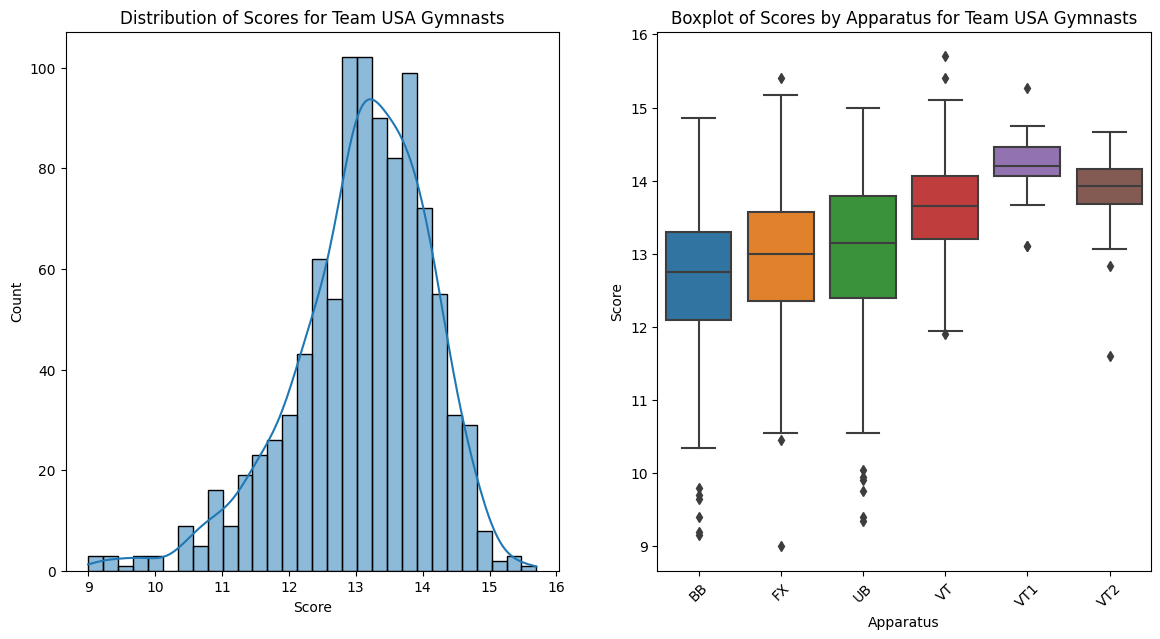

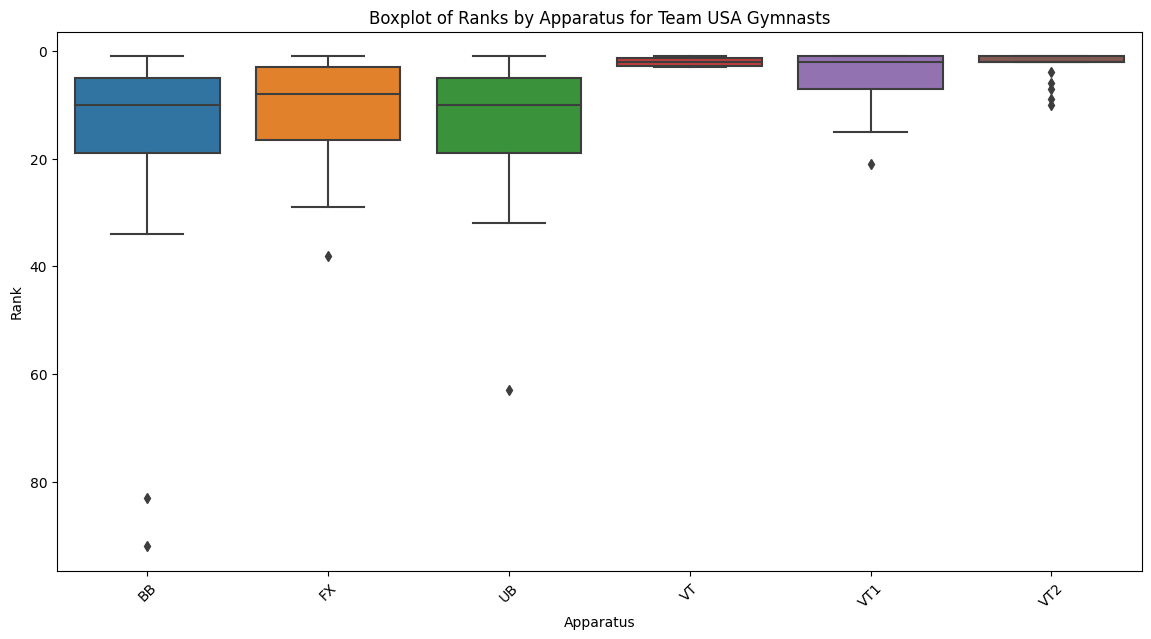

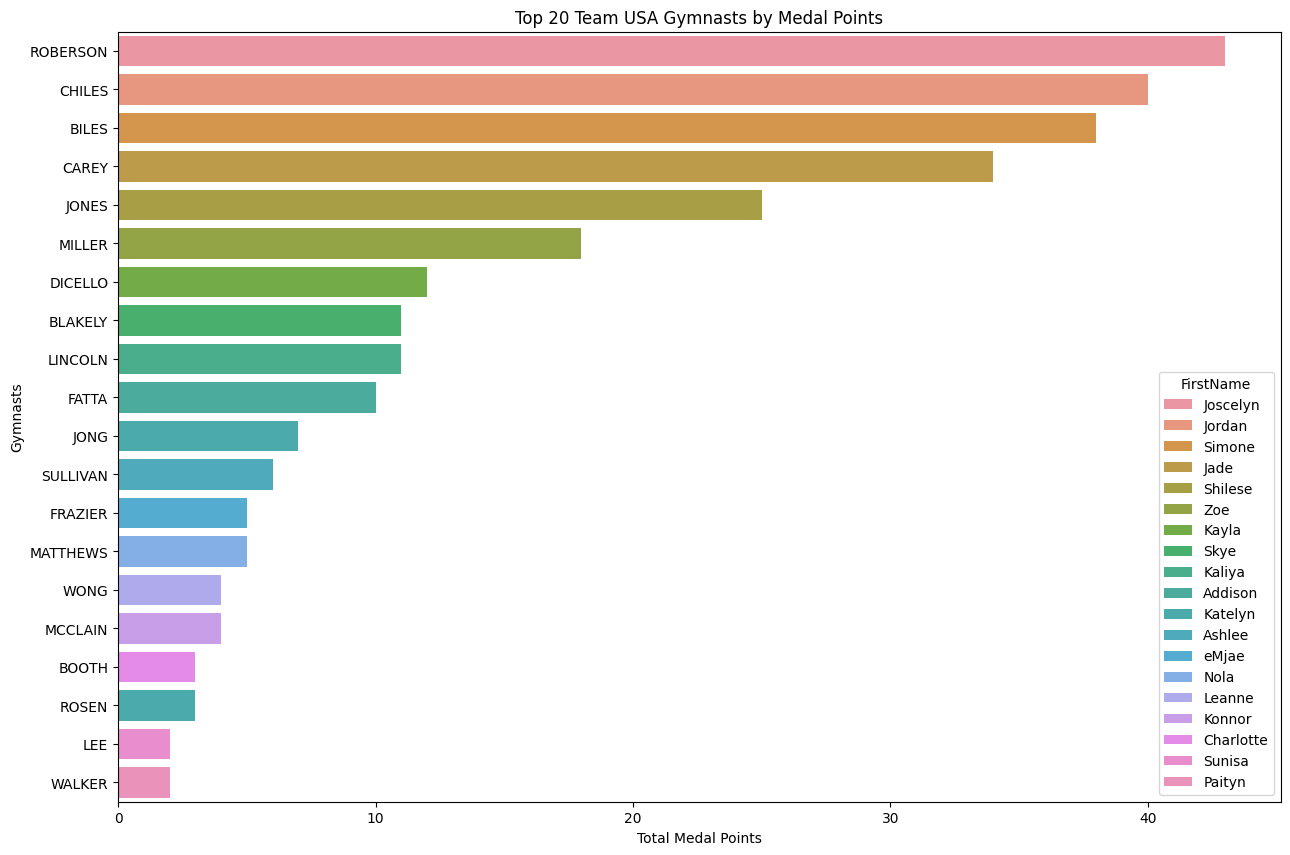

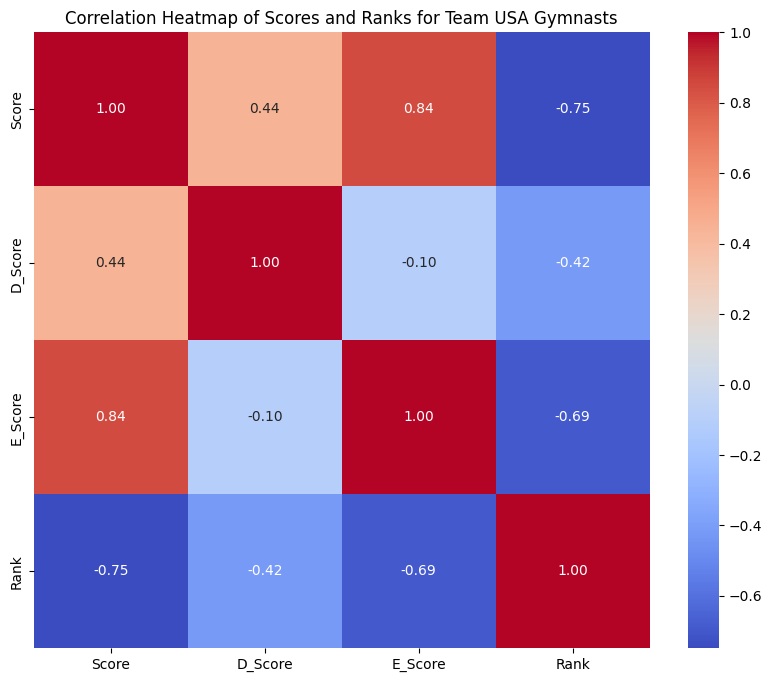

In [ ]:
############### EDA ###############
# Distribution of Scores for Team USA gymnasts
plt.figure(figsize=(14, 7))

# Histogram of Scores
plt.subplot(1, 2, 1)
sns.histplot(usa_gymnastics_data_w['Score'], bins=30, kde=True)
plt.title('Distribution of Scores for Team USA Gymnasts')

# Boxplot of Scores by Apparatus
plt.subplot(1, 2, 2)
sns.boxplot(x='Apparatus', y='Score', data=usa_gymnastics_data_w)
plt.title('Boxplot of Scores by Apparatus for Team USA Gymnasts')
plt.xticks(rotation=45)
plt.show()

# Boxplot of Ranks by Apparatus
plt.figure(figsize=(14, 7))
sns.boxplot(x='Apparatus', y='Rank', data=usa_gymnastics_data_w)
plt.title('Boxplot of Ranks by Apparatus for Team USA Gymnasts')
plt.gca().invert_yaxis()  # Invert y-axis to have the best ranks at the top
plt.xticks(rotation=45)
plt.show()

# EDA: Distribution of Medal Points for Team USA gymnasts
plt.figure(figsize=(15, 10))
# We will only display the top 20 gymnasts with the most medal points for clarity
top_medal_points = usa_gymnastics_data_w.groupby(['FirstName', 'LastName'])['Medal_Points'].sum().reset_index()
top_medal_points = top_medal_points.sort_values(by='Medal_Points', ascending=False).head(20)

# Barplot of Medal Points
sns.barplot(x='Medal_Points', y='LastName', data=top_medal_points, hue='FirstName', dodge=False)
plt.title('Top 20 Team USA Gymnasts by Medal Points')
plt.xlabel('Total Medal Points')
plt.ylabel('Gymnasts')
plt.show()

# Calculate the correlation matrix for the numerical features of the Team USA gymnasts
correlation_matrix = usa_gymnastics_data_w[['Score', 'D_Score', 'E_Score', 'Rank']].corr()
# Generate a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title('Correlation Heatmap of Scores and Ranks for Team USA Gymnasts')
plt.show()

In [ ]:
#Group the data by gymnast and apparatus to get a summary of their performances
gymnast_performance_summary_w = usa_gymnastics_data_w.groupby(['FirstName', 'LastName', 'Apparatus'])\
                                                  .agg({'Rank': ['min', 'mean'], # Minimum and mean rank for medal potential
                                                        'Score': 'mean', # Mean score for performance level
                                                        'Medal_Points': 'sum'}) # Total medal points for weighted medal count
# Flatten the multi-level column index resulted from aggregation
gymnast_performance_summary_w.columns = ['_'.join(col).strip() for col in gymnast_performance_summary_w.columns.values]

# Reset index to make 'FirstName', 'LastName', and 'Apparatus' as columns again
gymnast_performance_summary_w.reset_index(inplace=True)

# We will sort by total medal points to identify top performers, then by mean score as a secondary criterion
gymnast_performance_summary_sorted_w = gymnast_performance_summary_w.sort_values(by=['Medal_Points_sum', 'Score_mean'], ascending=[False, False])

# Display top performers based on medal points and scores
gymnast_performance_summary_sorted_w.head()

,FirstName,LastName,Apparatus,Rank_min,Rank_mean,Score_mean,Medal_Points_sum
230,Zoe,MILLER,UB,1.0,2.000000,14.007222,18
100,Joscelyn,ROBERSON,FX,1.0,3.777778,13.419154,15
87,Jade,CAREY,VT1,1.0,1.200000,14.646600,14
200,Shilese,JONES,UB,1.0,2.888889,14.509733,14
93,Jordan,CHILES,VT1,2.0,2.142857,14.349714,13


In [ ]:
# Identify the top performers for each apparatus based on the historical data
# We will calculate the average score for each gymnast on each apparatus
# Then we will select the top 4 gymnasts based on the average score for the '4 up, 3 count' simulation

# Calculate average score for each gymnast on each apparatus
apparatus_average_scores_w = usa_gymnastics_data_w.groupby(['Apparatus', 'FirstName', 'LastName'])\
                                             .agg({'Score': 'mean'})\
                                             .reset_index()

# Sort the results to find the top performers for each apparatus
top_performers_per_apparatus_w = apparatus_average_scores_w.sort_values(['Apparatus', 'Score'], ascending=[True, False])

# Now we create a dictionary to hold the top 4 gymnasts for each apparatus
top_performers_dict_w = {}

for apparatus in top_performers_per_apparatus_w['Apparatus'].unique():
    top_performers_dict_w[apparatus] = top_performers_per_apparatus_w[top_performers_per_apparatus_w['Apparatus'] == apparatus].head(4)

top_performers_dict_w['FX']  # Example output for Floor Exercise (FX)

,Apparatus,FirstName,LastName,Score
102,FX,Simone,BILES,14.866429
79,FX,Joscelyn Michelle,ROBERSON,14.083500
80,FX,Kaliya,LINCOLN,14.005500
75,FX,Jade,CAREY,13.801875


In [ ]:
# Initialize an empty list to hold dataframes for top performers
top_performers_list_w = []

# Loop through each apparatus and get the top 4 performers
for apparatus in usa_gymnastics_data_w['Apparatus'].unique():
    top_performers_w = apparatus_average_scores_w[apparatus_average_scores_w['Apparatus'] == apparatus]\
                     .nlargest(4, 'Score')
    top_performers_list_w.append(top_performers_w)

# Concatenate all the dataframes in the list into one dataframe
top_performers_all_apparatus_w = pd.concat(top_performers_list_w)

def simulate_4_up_3_count_w(apparatus_data_w):
    # Sort the gymnasts by score in descending order (best scores first)
    sorted_gymnasts_w = apparatus_data_w.sort_values('Score', ascending=False)
    # Take the scores of the top 4 gymnasts
    top_scores_w = sorted_gymnasts_w.head(4)['Score']
    # Sum the best 3 scores out of the top 4 for the team score
    team_score_w = top_scores_w.nlargest(3).sum()
    return team_score_w


# the '4 up, 3 count' simulation
team_scores_qualification_w = top_performers_all_apparatus_w.groupby('Apparatus')\
                                                        .apply(simulate_4_up_3_count_w)\
                                                        .reset_index(name='Team_Score')

# Display the team scores for each apparatus
team_scores_qualification_w.sort_values('Team_Score', ascending=False)

# %%
# For '3 up, 3 count' simulation, we sum the scores for the top three gymnasts for each apparatus
# This function will be used to perform the simulation for each apparatus
def simulate_3_up_3_count_w(apparatus_data_w):
    # Sort the gymnasts by score in descending order (best scores first)
    sorted_gymnasts_w = apparatus_data_w.sort_values('Score', ascending=False)
    # Take the scores of the top 3 gymnasts since all scores count in the '3 up, 3 count' format
    team_score_W = sorted_gymnasts_w.head(3)['Score'].sum()
    return team_score_W

# Apply the simulation for each apparatus and get the team score
team_scores_final_w = top_performers_all_apparatus_w.groupby('Apparatus')\
                                                 .apply(simulate_3_up_3_count_w)\
                                                 .reset_index(name='Team_Score')

# Display the team scores for each apparatus for the '3 up, 3 count' scenario
team_scores_final_w.sort_values('Team_Score', ascending=False)

,Apparatus,Team_Score
3,VT,44.067167
4,VT1,43.845814
0,BB,43.216524
1,FX,42.955429
5,VT2,42.820000
2,UB,42.800233


In [ ]:
# Calculate the total medal count for each gymnast
total_medals_w = usa_gymnastics_data_w.groupby(['FirstName', 'LastName'])['Medal_Points'].sum().reset_index()

# Calculate the number of gold medals for each gymnast (gold is represented by 3 points in Medal_Points)
gold_medals_w = usa_gymnastics_data_w[usa_gymnastics_data_w['Medal_Points'] == 3].groupby(['FirstName', 'LastName']).size().reset_index(name='Gold_Count')

# Merge the total medals and gold medal counts
medal_counts_w = total_medals_w.merge(gold_medals_w, on=['FirstName', 'LastName'], how='left')
medal_counts_w['Gold_Count'] = medal_counts_w['Gold_Count'].fillna(0)

# Calculate the weighted medal count
medal_counts_w['Weighted_Medal_Count'] = medal_counts_w['Medal_Points']  # This already represents the weighted count

# Display the gymnasts sorted by total medals, gold medals, and weighted medal count
medal_counts_w.sort_values(by=['Medal_Points', 'Gold_Count', 'Weighted_Medal_Count'], ascending=False).head()

# %%
# Calculate the average score and standard deviation for each gymnast on each apparatus
gymnast_scores_stats_w = usa_gymnastics_data_w.groupby(['FirstName', 'LastName', 'Apparatus'])\
                                         .agg(Average_Score=('Score', 'mean'),
                                              Score_SD=('Score', 'std'),
                                              Routine_Count=('Score', 'count'))\
                                         .reset_index()

# Replace NaN values in Score_SD with 0 (occurs when there's only one score)
gymnast_scores_stats_w['Score_SD'] = gymnast_scores_stats_w['Score_SD'].fillna(0)

# Now, let's calculate the number of medals each gymnast has won
# We consider the Medal_Points where 3 points = Gold, 2 points = Silver, 1 point = Bronze
medal_counts_w = usa_gymnastics_data_w.groupby(['FirstName', 'LastName'])\
                                 .agg(Total_Medal_Points=('Medal_Points', 'sum'),
                                      Gold_Medal_Count=('Medal_Points', lambda x: (x==3).sum()),
                                      Silver_Medal_Count=('Medal_Points', lambda x: (x==2).sum()),
                                      Bronze_Medal_Count=('Medal_Points', lambda x: (x==1).sum()))\
                                 .reset_index()

# Merge the scores stats with the medal counts to get a combined dataframe
gymnast_performance_summary_w = pd.merge(gymnast_scores_stats_w, medal_counts_w, on=['FirstName', 'LastName'])

# Sort by Average Score and Total Medal Points to identify the top performers
gymnast_performance_summary_w.sort_values(by=['Average_Score', 'Total_Medal_Points'], ascending=[False, False]).head()

,FirstName,LastName,Apparatus,Average_Score,Score_SD,Routine_Count,Total_Medal_Points,Gold_Medal_Count,Silver_Medal_Count,Bronze_Medal_Count
206,Simone,BILES,VT,15.170000,0.380132,5,38,11,2,1
204,Simone,BILES,FX,14.866429,0.316263,7,38,11,2,1
207,Simone,BILES,VT1,14.849500,0.589020,2,38,11,2,1
208,Simone,BILES,VT2,14.649500,0.023335,2,38,11,2,1
87,Jade,CAREY,VT1,14.646600,0.089207,5,34,8,4,2


In [ ]:
# Function to select top 3 gymnasts for each apparatus and simulate the '3 up, 3 count' team score
def simulate_team_all_around_w(top_performers_w):
    team_all_around_score_w = 0
    for apparatus in top_performers_w['Apparatus'].unique():
        apparatus_scores_w = top_performers_w[top_performers_w['Apparatus'] == apparatus]
        team_all_around_score_w += apparatus_scores_w.head(3)['Average_Score'].sum()
    return team_all_around_score_w

# Select top 3 gymnasts for each apparatus based on their average scores
top_3_per_apparatus_w = gymnast_scores_stats_w.groupby('Apparatus')\
                                          .apply(lambda x: x.nlargest(3, 'Average_Score'))\
                                          .reset_index(drop=True)

# Simulate the '3 up, 3 count' team score for the all-around event
team_all_around_score_w = simulate_team_all_around_w(top_3_per_apparatus_w)

team_all_around_score_w

259.7051666666667

In [ ]:
# We need to identify the threshold scores that typically qualify a gymnast for event finals at the Olympics.
# For the sake of this simulation, let's assume that the top 8 scores in our dataset are a good proxy for finals qualification.

# Define a function to estimate individual event success
def estimate_event_success_w(apparatus_data_w, top_n=8):
    # Assuming the top_n scores could be a proxy for finals qualification
    qualifying_scores_w = apparatus_data_w.nlargest(top_n, 'Average_Score')['Average_Score'].min()
    # Estimate success by checking how many times gymnasts have scored above this threshold
    apparatus_data_w['Qualify_Probability'] = apparatus_data_w['Average_Score'].apply(lambda x: 1 if x >= qualifying_scores_w else 0)
    return apparatus_data_w

# Apply the function to each apparatus
individual_event_success_w = top_3_per_apparatus_w.groupby('Apparatus').apply(estimate_event_success_w).reset_index(drop=True)

# Now, let's sort the data to see which gymnasts are most likely to qualify for the finals
individual_event_success_w = individual_event_success_w.sort_values(by=['Apparatus', 'Qualify_Probability', 'Average_Score'], ascending=[True, False, False])
individual_event_success_w[['Apparatus', 'FirstName', 'LastName', 'Average_Score', 'Qualify_Probability']]

<ipython-input-82-d3791d547859>:13: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  individual_event_success_w = top_3_per_apparatus_w.groupby('Apparatus').apply(estimate_event_success_w).reset_index(drop=True)


,Apparatus,FirstName,LastName,Average_Score,Qualify_Probability
0,BB,Simone,BILES,14.599857,1
1,BB,Konnor,MCCLAIN,14.500000,1
2,BB,Sunisa,LEE,14.116667,1
3,FX,Simone,BILES,14.866429,1
4,FX,Joscelyn Michelle,ROBERSON,14.083500,1
5,FX,Kaliya,LINCOLN,14.005500,1
6,UB,Shilese,JONES,14.509733,1
7,UB,Simone,BILES,14.257000,1
8,UB,Nola Rhianne,MATTHEWS,14.033500,1
9,VT,Simone,BILES,15.170000,1


In [ ]:
# Data Preparation for ML Model

# Selecting relevant features for the model
# We assume 'Score' is the average score, 'Medal_Points' is the total medal points for each gymnast
features_w = ['FirstName', 'LastName', 'Apparatus', 'Average_Score', 'Score_SD', 'Total_Medal_Points',
            'Gold_Medal_Count', 'Silver_Medal_Count', 'Bronze_Medal_Count']

# Preparing the dataset for the model, we need to pivot the apparatus to create a feature for each
gymnast_scores_pivot_w = gymnast_scores_stats_w.pivot_table(index=['FirstName', 'LastName'],
                                                        columns='Apparatus',
                                                        values='Average_Score').reset_index()

# Fill any NaN values with the mean score of each gymnast across all apparatuses
gymnast_scores_pivot_w = gymnast_scores_pivot_w.fillna(gymnast_scores_pivot_w.mean(axis=1, numeric_only=True))
# Merge with the medal counts data
ml_dataset_w = pd.merge(gymnast_scores_pivot_w, medal_counts_w, on=['FirstName', 'LastName'])

# Check the prepared dataset
ml_dataset_w.head()


# %%
# Dropping non-numeric columns for modeling
ml_features_w = ml_dataset_w.drop(['FirstName', 'LastName'], axis=1)

# We need to separate the features and the target variable
Xw = ml_features_w.drop('Total_Medal_Points', axis=1)
yw = ml_features_w['Total_Medal_Points']

# Splitting the data into training and testing sets
Xw_train, Xw_test, yw_train, yw_test = train_test_split(Xw, yw, test_size=0.2, random_state=42)
# Recheck for NaN values and fill them with the mean of the columns if necessary
Xw_train_mean = Xw_train.mean()
Xw_train_filled = Xw_train.fillna(Xw_train_mean)
Xw_test_filled = Xw_test.fillna(Xw_train_mean)

# Normalizing the features again
scaler = StandardScaler()
Xw_train_scaled = scaler.fit_transform(Xw_train_filled)
Xw_test_scaled = scaler.transform(Xw_test_filled)
modelw = RandomForestRegressor(n_estimators=100, random_state=42)
# Retraining the RandomForestRegressor model
modelw.fit(Xw_train_scaled, yw_train)

# Redoing the prediction on the testing set
yw_pred = modelw.predict(Xw_test_scaled)

# Recalculating the mean squared error of the predictions
mse_w = mean_squared_error(yw_test, yw_pred)
mse_w

# %%
# Predicting the total medal points for each gymnast using the trained model on the entire dataset
Xw_filled = Xw.fillna(Xw_train_mean)
Xw_scaled = scaler.transform(Xw_filled)  # Normalize the entire feature set
predicted_medal_points_w = modelw.predict(Xw_scaled)

# Adding the predictions back to the original dataset to see actual vs predicted
ml_dataset_w['Predicted_Medal_Points'] = predicted_medal_points_w

# Now we sort the dataset by the predicted medal points to see the top predicted medalists
top_predicted_medalists_w = ml_dataset_w.sort_values(by='Predicted_Medal_Points', ascending=False)

# Show the top predicted medalists along with their actual total medal points for comparison
top_predicted_medalists_w[['FirstName', 'LastName', 'Total_Medal_Points', 'Predicted_Medal_Points']].head()
# %%
# Initialize the optimization problem
team_selection_w = pulp.LpProblem("Team_Selection", pulp.LpMaximize)

# Create decision variables for each gymnast
gymnast_vars_w = [pulp.LpVariable(f'gymnast_{i}', cat='Binary') for i in range(len(ml_dataset_w))]

# Objective function: Maximize the sum of predicted medal points
team_selection_w += pulp.lpSum([gymnast_vars_w[i] * ml_dataset_w.loc[i, 'Predicted_Medal_Points'] for i in range(len(ml_dataset_w))])

# Constraint: Select exactly 5 gymnasts
team_selection_w += pulp.lpSum(gymnast_vars_w) == 5, "Select_5_gymnasts"

# Solve the problem
team_selection_w.solve()

# Extract the results: The selected gymnasts will have their corresponding decision variables set to 1
selected_gymnasts_indices_w = [i for i in range(len(ml_dataset_w)) if pulp.value(gymnast_vars_w[i]) == 1]
selected_gymnasts_w = ml_dataset_w.iloc[selected_gymnasts_indices_w]

# Display the selected gymnasts
print(selected_gymnasts_w[['FirstName', 'LastName', 'Predicted_Medal_Points']])

selected_gymnasts_df_w = ml_dataset_w.iloc[selected_gymnasts_indices_w]
selected_gymnasts_df_w = selected_gymnasts_df_w[['FirstName', 'LastName', 'Predicted_Medal_Points']]

# Display the DataFrame
selected_gymnasts_df_w

   FirstName  LastName  Predicted_Medal_Points
22      Jade     CAREY                   32.51
23    Jordan    CHILES                   32.29
25  Joscelyn  ROBERSON                   15.09
50   Shilese     JONES                   23.84
51    Simone     BILES                   33.01


,FirstName,LastName,Predicted_Medal_Points
22,Jade,CAREY,32.51
23,Jordan,CHILES,32.29
25,Joscelyn,ROBERSON,15.09
50,Shilese,JONES,23.84
51,Simone,BILES,33.01
